In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go


In [2]:
df = pd.read_csv('Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [3]:
df.describe(include = 'all')

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()*100/len(df) # Percentage of missing values

Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64

In [6]:
df = df.drop('Date',axis=1) 

for column in ['Temperature','Fuel_Price','CPI','Unemployment']:
    df = df[df[column].between((df[column].mean()-3*df[column].std()),(df[column].mean()+3*df[column].std()))] #delete outliers
df = df[df['Weekly_Sales'].notna()]

for column in ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI']: 
    df[column].fillna(df[column].median(), inplace=True)     # replace missing values per median
df = df[df['Weekly_Sales'].notna()]



In [7]:
df['Holiday_Flag'] = df['Holiday_Flag'].astype(int)
df['Store'] = df['Store'].astype(int)

In [8]:
df.isna().sum()*100/len(df)

Store           0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
dtype: float64

DATA EXPLORATION

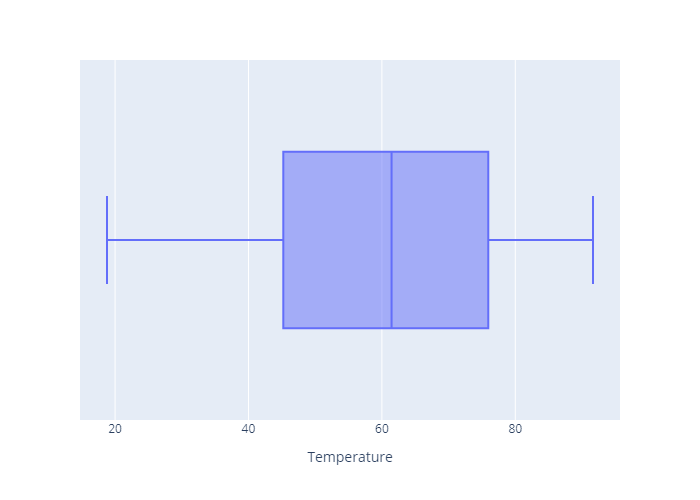

In [14]:
fig = px.box(data_frame=df , x = 'Temperature')
fig.show('png')

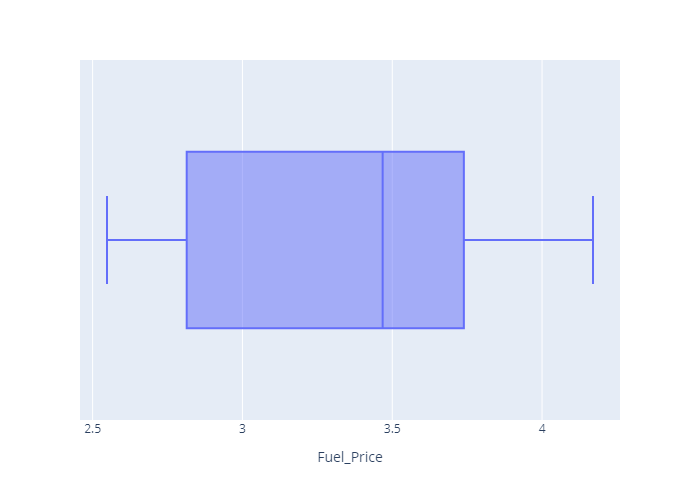

In [15]:
fig = px.box(data_frame=df , x = 'Fuel_Price')
fig.show('png')

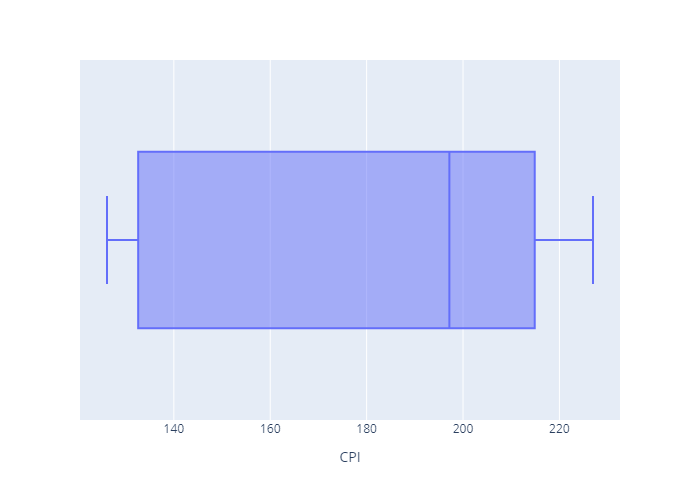

In [16]:
fig = px.box(data_frame=df, x = 'CPI')
fig.show('png')

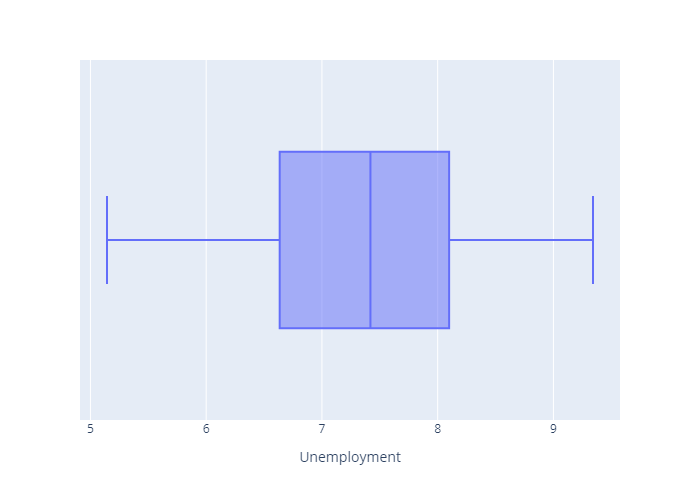

In [17]:
fig = px.box(data_frame=df ,x='Unemployment')
fig.show('png')

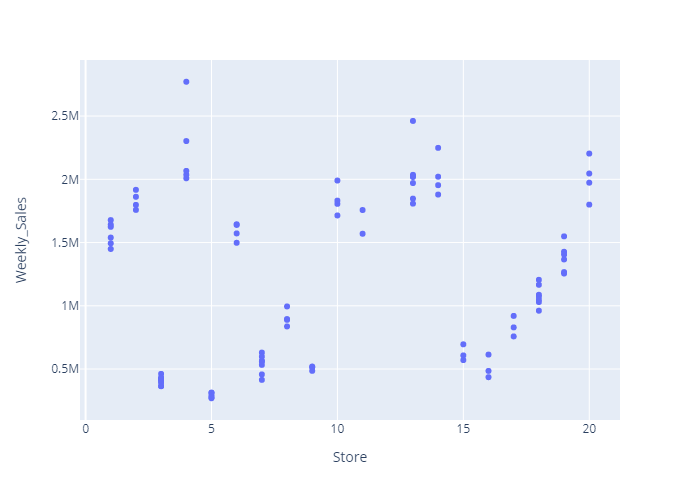

In [18]:
fig = px.scatter(data_frame=df,x = 'Store', y= 'Weekly_Sales')
fig.show('png')


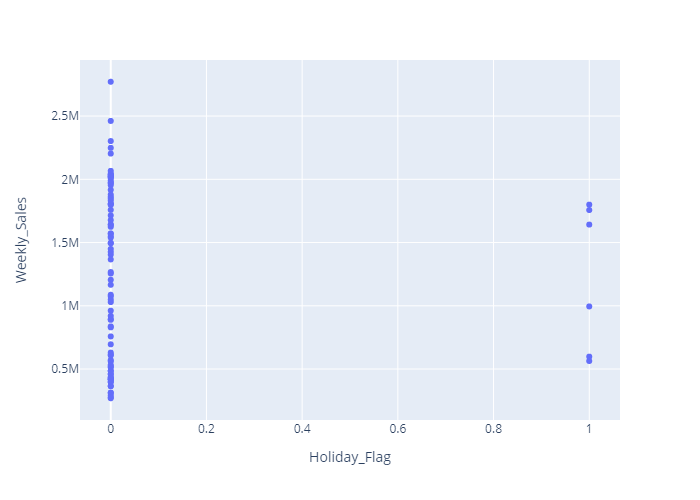

In [19]:
fig = px.scatter(data_frame=df,x = 'Holiday_Flag', y= 'Weekly_Sales')
fig.show('png')

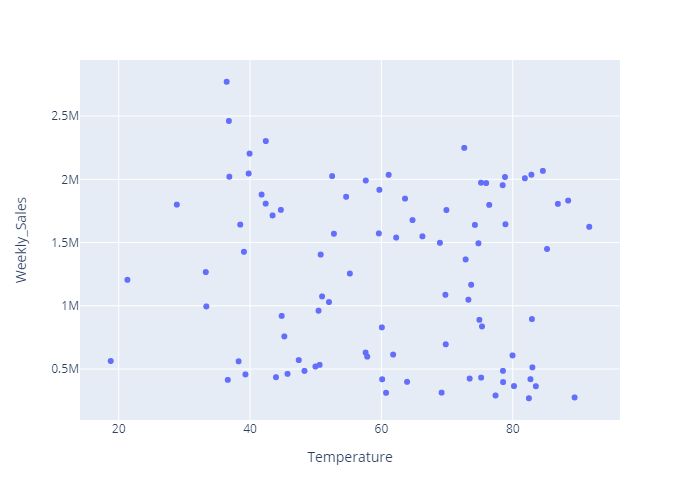

In [20]:
fig = px.scatter(data_frame=df , x = 'Temperature', y = 'Weekly_Sales' )
fig.show('png')

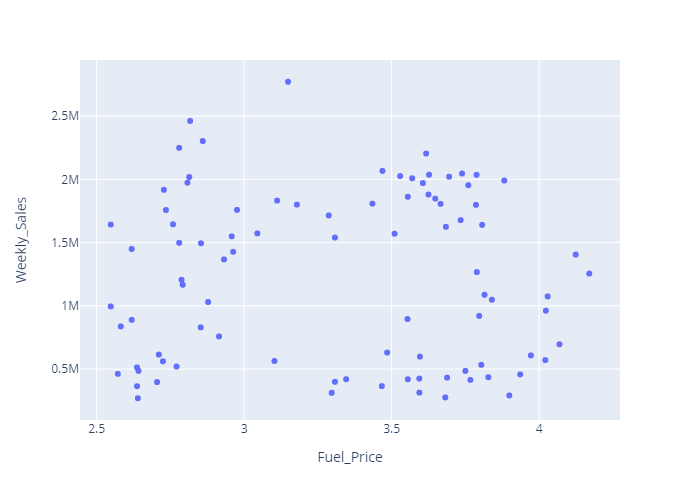

In [21]:
fig = px.scatter(data_frame=df , x = 'Fuel_Price', y = 'Weekly_Sales')
fig.show('png')

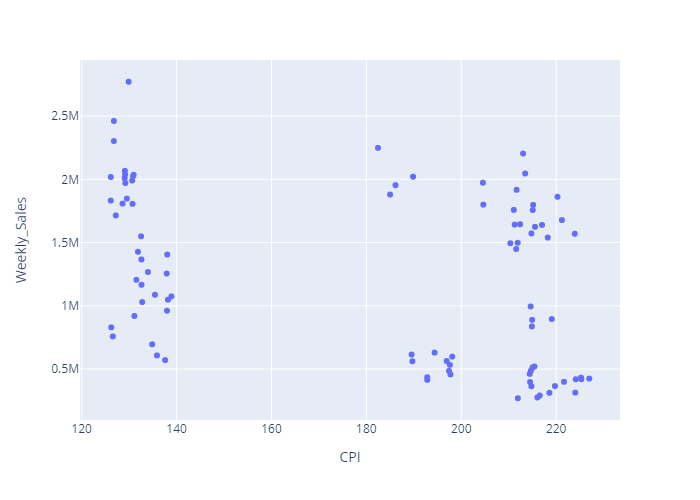

In [22]:
fig = px.scatter(data_frame=df , x = 'CPI', y = 'Weekly_Sales')
fig.show('png')

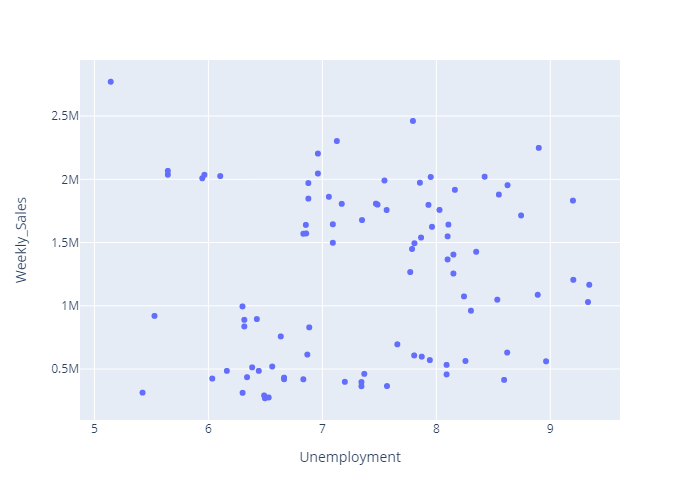

In [23]:
fig = px.scatter(data_frame=df , x = 'Unemployment', y = 'Weekly_Sales')
fig.show('png')

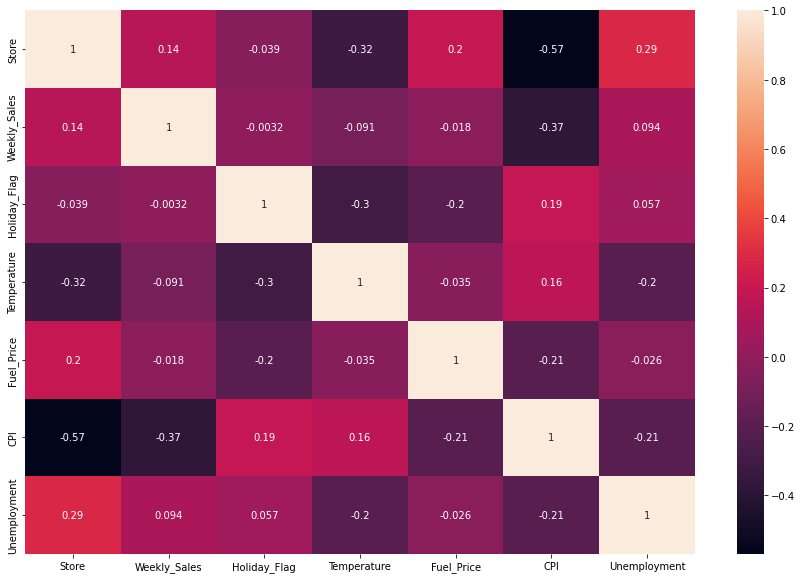

In [24]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

plt.show()

In [20]:
print("Separating labels from features...")

X = df.drop(['Weekly_Sales'],axis=1)
Y = df.loc[:,'Weekly_Sales']

print("...Done.")
print()

Separating labels from features...
...Done.



In [21]:
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=0)
print("...Done.")

Dividing into train and test sets...
...Done.


In [22]:
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[[ 16.          0.         61.79        2.711     189.5231276   6.868    ]
 [  5.          0.         69.17        3.594     224.0192873   5.422    ]
 [ 19.          0.         33.26        3.789     133.9587419   7.771    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [  1.          0.         74.78        2.854     210.3374261   7.808    ]]
[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [  7.          0.         38.26        2.725     189.7048215   8.963    ]]

[ 614253.33  313358.15 1266564.94  895066.5  1494251.5 ]
[1644470.66  561145.14]


In [23]:
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6,0,59.61,3.045,214.777523,6.858
1,13,0,42.38,3.435,128.616064,7.470
4,6,0,78.89,2.759,212.412888,7.092
6,15,0,69.80,4.069,134.855161,7.658
7,20,0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...
139,7,0,50.60,3.804,197.588605,8.090
143,3,0,78.53,2.705,214.495838,7.343
144,3,0,73.44,3.594,226.968844,6.034
145,14,0,72.62,2.780,182.442420,8.899


In [24]:
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
        ('one', OneHotEncoder(drop='first'))
        ])

In [25]:
preprocessor = ColumnTransformer(
    transformers=[

        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()


print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) 
print('...Done.')
print(X_test[0:5,:])


Performing preprocessings on train set...
[[ 16.          0.         61.79        2.711     189.5231276   6.868    ]
 [  5.          0.         69.17        3.594     224.0192873   5.422    ]
 [ 19.          0.         33.26        3.789     133.9587419   7.771    ]
 [  8.          0.         82.92        3.554     219.0701968   6.425    ]
 [  1.          0.         74.78        2.854     210.3374261   7.808    ]]
...Done.
  (0, 13)	1.0
  (1, 3)	1.0
  (2, 16)	1.0
  (3, 6)	1.0

Performing preprocessings on test set...
[[  6.          0.         78.89        2.759     212.412888    7.092    ]
 [  7.          0.         38.26        2.725     189.7048215   8.963    ]
 [ 11.          0.         52.77        3.51      223.9170153   6.833    ]
 [ 10.          0.         57.62        3.882     130.6457931   7.545    ]
 [  3.          0.         82.7         3.346     225.3068615   6.664    ]]
...Done.
  (0, 4)	1.0
  (1, 5)	1.0
  (2, 9)	1.0
  (3, 8)	1.0
  (4, 1)	1.0


Test linear Regression simple

In [27]:
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [28]:
regressor.score(X_train,Y_train)

0.977536539012081

In [29]:
regressor.score(X_test,Y_test)

0.9357089954340374

In [30]:
params = {
'fit_intercept' : [True,False],'positive': [True,False]

}
gridsearch_reg = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch_reg.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_reg.best_params_)
print("Best R2 score : ", gridsearch_reg.best_score_)

Y_train_pred_gridsearch_reg = gridsearch_reg.best_estimator_.predict(X_train)
Y_test_pred_gridsearch_reg = gridsearch_reg.best_estimator_.predict(X_test)
print()


...Done.
Best hyperparameters :  {'fit_intercept': True, 'positive': False}
Best R2 score :  0.8059592801595126



C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:379: FitFailedWarning:


6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py", line 662, in fit
    X, y = self._validate_data(
  File "C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [31]:
print('MSE TRAIN....')
print()
print ('Mean square error train gridsearch :' ,mean_squared_error(Y_train, Y_train_pred_gridsearch_reg))
print()
print('MSE TEST....')
print()
print ('Mean square error test gridsearch :' ,mean_squared_error(Y_test, Y_test_pred_gridsearch_reg))

print('Train score gridsearch : ',gridsearch_reg.score(X_train,Y_train))
print('Test score gridsearch : ',gridsearch_reg.score(X_test,Y_test))

n = X.shape[0]
p = X.shape[1]
R_2_train_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_reg.best_estimator_.score(X_train,Y_train))
print(f"R square adjusted train {R_2_train_adj}")
R_2_test_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_reg.best_estimator_.score(X_test,Y_test))
print(f"R square adjusted test {R_2_test_adj}")

MSE TRAIN....

Mean square error train gridsearch : 9390378322.30008

MSE TEST....

Mean square error test gridsearch : 32420850634.181824
Train score gridsearch :  0.977536539012081
Test score gridsearch :  0.9357089954340374
R square adjusted train 0.975912674362352
R square adjusted test 0.9310614529352931


In [32]:
list_tranform = list(X.columns)+list(preprocessor.named_transformers_['cat'].named_steps['one'].get_feature_names_out(input_features=X.columns[categorical_features]))

In [33]:
data_coef_reg = pd.concat([pd.DataFrame(list_tranform),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)

In [34]:
data_coef_reg.columns = ['Features_name','coef']

In [35]:
data_coef_reg.sort_values(by='coef',ascending=False)

,Features_name,coef
2,Temperature,5.642013e+05
10,Store_6.0,4.617375e+05
11,Store_7.0,4.546567e+05
17,Store_14.0,4.343313e+05
0,Store,2.627083e+05
8,Store_4.0,2.131038e+05
9,Store_5.0,1.850075e+05
18,Store_15.0,1.343552e+03
4,CPI,-1.039213e+03
16,Store_13.0,-1.741447e+05


Test du model Rigde

In [36]:
ridge = Ridge()
scores = cross_val_score(ridge,X_train,Y_train,cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.7724566510573471
The standard deviation is :  0.07261446361852768


In [37]:
print("Grid search Ridge...")

params = {
    'alpha': [0.07,0.08,0.09999], # 0 corresponds to no regularization
    'copy_X' : [True,False],
    'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'random_state' : [9,10]

}
gridsearch_ridge = GridSearchCV(ridge, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch_ridge.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_ridge.best_params_)
print("Best R2 score : ", gridsearch_ridge.best_score_)

Y_train_pred_gridsearch_ridge = gridsearch_ridge.best_estimator_.predict(X_train)
Y_test_pred_gridsearch_ridge = gridsearch_ridge.best_estimator_.predict(X_test)



Grid search Ridge...


C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:743: UserWarning:

"sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:743: UserWarning:

"sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standardized).

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:743: UserWarning:

"sag" solver requires many iterations to fit an intercept with sparse inputs. Either set the solver to "auto" or "sparse_cg", or set a low "tol" and a high "max_iter" (especially if inputs are not standard

...Done.
Best hyperparameters :  {'alpha': 0.09999, 'copy_X': True, 'random_state': 10, 'solver': 'sag'}
Best R2 score :  0.8438636740794853


In [38]:

print('MSE TRAIN....')
print()
print ('Mean square error train gridsearch :' ,mean_squared_error(Y_train, Y_train_pred_gridsearch_ridge))

print('MSE TEST....')
print()
print ('Mean square error test gridsearch :' ,mean_squared_error(Y_test, Y_test_pred_gridsearch_ridge))

print('Train score gridsearch : ',gridsearch_ridge.score(X_train,Y_train))
print('Test score gridsearch : ',gridsearch_ridge.score(X_test,Y_test))

n = X.shape[0]
p = X.shape[1]
R_2_train_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_ridge.best_estimator_.score(X_train,Y_train))
print(f"R square adjusted train {R_2_train_adj}")
R_2_test_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_ridge.best_estimator_.score(X_test,Y_test))
print(f"R square adjusted test {R_2_test_adj}")

MSE TRAIN....

Mean square error train gridsearch : 10969508961.31631
MSE TEST....

Mean square error test gridsearch : 33758618344.73613
Train score gridsearch :  0.9737589766725395
Test score gridsearch :  0.9330561831757198
R square adjusted train 0.971862035227181
R square adjusted test 0.9282168711161333


In [39]:
#data_coef_ridge = pd.concat([pd.DataFrame(list_tranform), pd.DataFrame(np.transpose(ridge.coef_))], axis=1)
#data_coef_ridge.columns = ['Features_name', 'coef']
#data_coef_ridge.sort_values(by='coef', ascending=False)

Test du modele Lasso

In [40]:
lasso =  Lasso()
scores = cross_val_score(lasso,X_train,Y_train,cv=3)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

The cross-validated R2-score is :  0.805980670361258
The standard deviation is :  0.1687623829758869


In [41]:
lasso.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [42]:
print("Grid search Lasso...")

params = {
    'alpha': [0.0001,50,100],'fit_intercept':[True,False],'warm_start':[True,False],'selection':['cyclic','random'],'positive':[True,False],'random_state':[500,1500]


}
gridsearch_lasso = GridSearchCV(lasso, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch_lasso.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch_lasso.best_params_)
print("Best R2 score : ", gridsearch_lasso.best_score_)


Y_train_pred_gridsearch_lasso = gridsearch_lasso.best_estimator_.predict(X_train)
Y_test_pred_gridsearch_lasso = gridsearch_lasso.best_estimator_.predict(X_test)
mean_squared_error(Y_test,Y_test_pred_gridsearch_lasso)

Grid search Lasso...
...Done.
Best hyperparameters :  {'alpha': 100, 'fit_intercept': True, 'positive': False, 'random_state': 1500, 'selection': 'random', 'warm_start': True}
Best R2 score :  0.808128153201421


32573522860.141323

In [43]:
print('MSE TRAIN....')
print()
print ('Mean square error train gridsearch :' ,mean_squared_error(Y_train, Y_train_pred_gridsearch_lasso))

print('MSE TEST....')
print()
print ('Mean square error test gridsearch :' ,mean_squared_error(Y_test, Y_test_pred_gridsearch_lasso))

print('Train score gridsearch : ',gridsearch_lasso.best_estimator_.score(X_train,Y_train))
print('Test score gridsearch : ',gridsearch_lasso.best_estimator_.score(X_test,Y_test))
n = X.shape[0]
p = X.shape[1]
R_2_train_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_lasso.best_estimator_.score(X_train,Y_train))
print(f"R square adjusted train {R_2_train_adj}")
R_2_test_adj = 1 - (n-1)/(n-p-1)*(1-gridsearch_lasso.best_estimator_.score(X_test,Y_test))
print(f"R square adjusted test {R_2_test_adj}")

MSE TRAIN....

Mean square error train gridsearch : 9395138900.666264
MSE TEST....

Mean square error test gridsearch : 32573522860.141323
Train score gridsearch :  0.9775251508589377
Test score gridsearch :  0.9354062442543412
R square adjusted train 0.9759004629692223
R square adjusted test 0.930736816128149


In [44]:
#data_coef_lasso = pd.concat([pd.DataFrame(list_tranform), pd.DataFrame(np.transpose(lasso.coef_))], axis=1)
#data_coef_lasso.columns = ['Features_name', 'coef']
#data_coef_lasso.sort_values(by='coef', ascending=False)

Test de RandomForestRegressor

In [45]:
xxx = AdaBoostRegressor(base_estimator=gridsearch_lasso.best_estimator_,n_estimators=500,learning_rate=0.7)
xxx.fit(X_train,Y_train)
xxx.score(X_train,Y_train) , xxx.score(X_test,Y_test)

(0.9756835653259467, 0.9333643357632745)

In [46]:
grad=GradientBoostingRegressor(n_estimators=190,min_samples_split=7,learning_rate=0.15,random_state=500)
grad.fit(X_train,Y_train)
grad.score(X_train,Y_train) , grad.score(X_test,Y_test)

(0.9789633455982385, 0.9355136416245626)

The selected model will be: gridsearch_lasso, with the best adjusted R2.
MSE TRAIN....

Mean square error train gridsearch: 9395138900.666264
MSE TEST....

Mean square error test gridsearch: 32573522860.141323
Train gridsearch score: 0.9775251508589377
Gridsearch test score: 0.9354062442543412
R square adjusted train 0.9759004629692223
R square adjusted test 0.930736816128149


The MSE is quite high considering the dimension of the Y.
The number of observations is 90 so with more data the model would make fewer errors.